<a href="https://colab.research.google.com/github/Enzomania/Pytorch-Tutorial/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
## Create a model class that inherits from nn.Module
class Model(nn.Module):
  ## Input (4 features of flower --> H1(neuros) --> H2 (neurons) --> out(1 of 3 classes of flowers))
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)  ##fc = fully conected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [4]:
torch.manual_seed(23)
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [7]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
## Change last column from text to numbers
## create pandas data frames
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
## Train, Test, Split, set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [10]:
## create numpy arrays from data frames
X = X.values
y = y.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [13]:
## convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

## convert y labels to Long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
## set criterion of model to measure error
criterion = nn.CrossEntropyLoss()
## choose Adam optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
## train the model
## epochs = one run through all traing data in the network
epochs = 100
losses = []

for i in range(epochs):
  ## go forward ans get a prediction
  y_pred = model.forward(X_train)

  ## measure loss error (high at first)
  loss = criterion(y_pred, y_train)

  ## keep track of losses
  losses.append(loss.detach().numpy())

  ## print out every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} loss {loss}')

  ## do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 loss 1.0663906335830688
Epoch: 10 loss 0.7587270736694336
Epoch: 20 loss 0.5186899304389954
Epoch: 30 loss 0.3847818374633789
Epoch: 40 loss 0.2689681351184845
Epoch: 50 loss 0.17080016434192657
Epoch: 60 loss 0.1088680550456047
Epoch: 70 loss 0.07686984539031982
Epoch: 80 loss 0.06006046384572983
Epoch: 90 loss 0.05042722448706627


Text(0.5, 0, 'Epoch')

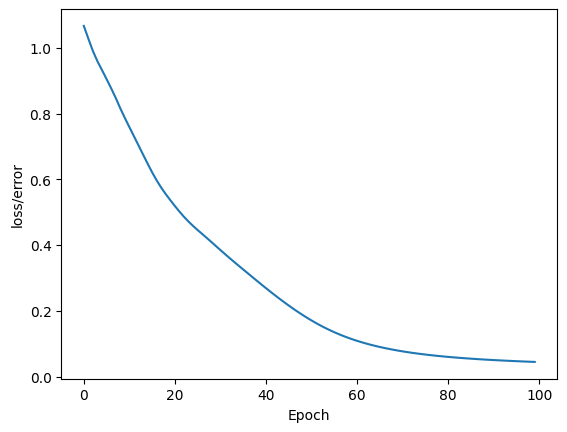

In [16]:
## graph it out
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [20]:
## evaluate model with test data
with torch.no_grad(): ## turn off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [21]:
loss

tensor(0.1299)

In [33]:

correct = 0
with torch.no_grad(): ## turn off back propagation
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    good = '-'
    if y_val.argmax().item() == y_test[i]:
      correct+=1
      good = '+'

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {good}')

print(f'We got {correct} correct')

1.) tensor([-7.9825,  1.6952,  4.6745]) 	 2 	 +
2.) tensor([-10.4299,   1.0295,   7.7125]) 	 2 	 +
3.) tensor([-11.1166,   1.5655,   7.5929]) 	 2 	 +
4.) tensor([-4.2218,  3.1699, -0.8574]) 	 1 	 +
5.) tensor([-9.3340,  1.6738,  5.8763]) 	 2 	 +
6.) tensor([-2.2657,  3.8346, -3.5906]) 	 1 	 +
7.) tensor([-7.3824,  2.0846,  3.5511]) 	 2 	 +
8.) tensor([-3.8992,  3.2206, -1.2192]) 	 1 	 +
9.) tensor([-8.2696,  1.8827,  4.6305]) 	 2 	 +
10.) tensor([-10.8961,   1.1033,   8.0273]) 	 2 	 +
11.) tensor([-6.8986,  2.1542,  3.0231]) 	 2 	 +
12.) tensor([ 12.4633,   6.1126, -20.8531]) 	 0 	 +
13.) tensor([ 11.0814,   5.4883, -18.5708]) 	 0 	 +
14.) tensor([-1.0463,  3.4897, -4.1614]) 	 1 	 +
15.) tensor([ 10.9807,   5.7339, -18.8958]) 	 0 	 +
16.) tensor([-6.5367,  2.4390,  2.2771]) 	 2 	 -
17.) tensor([ 11.4917,   5.7283, -19.3548]) 	 0 	 +
18.) tensor([-7.5431,  1.8718,  4.0202]) 	 1 	 -
19.) tensor([ 12.6761,   6.1303, -21.0515]) 	 0 	 +
20.) tensor([  9.8024,   5.1902, -16.9286]) 	 0 	 +
21

In [36]:
new_iris = torch.tensor([3.5, 2.1, 2.4, 1.8])

with torch.no_grad():
  print(model(new_iris))

tensor([-3.8059,  1.5821,  1.1995])


In [45]:
torch.save(model.state_dict, 'my_iris_model.pt')

In [50]:
new_model = Model()
state_dict = torch.load('my_iris_model.pt')
new_model.load_state_dict(state_dict)

TypeError: Expected state_dict to be dict-like, got <class 'method'>.